# Linear Regression - Penalized Model

In [2]:
#Table like structure
import pandas as pd

#numerical computation
import numpy as np


#scikit learn
#Ridge regression model
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Simple decision tree
from sklearn.tree import DecisionTreeRegressor
from math import sqrt




#import pytorch
import torch
import torch.nn as nn
import torch.optim as optim
#Used for normalizing the data
from sklearn.preprocessing import StandardScaler

#For generating graphs
import matplotlib.pyplot as plt


In [3]:
# Load the dataset and show its first 5 rows
data = pd.read_excel('.\\Dataset #1 - Regression (Brain Age Prediction)\\Volumetric_features.xlsx')
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [4]:
# Split the data into training and testing sets. The output label of the data is the age
#80% data is for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data.drop('Age', axis=1), data['Age'], test_size=0.2, random_state=0)
X_train.head() # print the first 5 records

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,dataset
883,884,18276.2,488.6,15488.8,60165.9,6753.3,3973.9,5154.7,2247.5,2230.6,...,2.531,2.323,2.423,3.351,2.447,2.759,2.26196,1210251,1753222.710,1
2404,2405,19564.2,1550.6,11636.4,50535.2,5335.3,3155.9,3791.9,1453.2,1918.1,...,2.708,2.330,2.502,2.974,2.195,2.686,2.24386,968762,1386457.527,5
1699,1700,14076.8,718.0,17377.2,54915.0,7591.1,3143.6,4072.2,1816.3,1710.6,...,2.872,2.436,2.518,3.951,2.571,2.859,2.44303,1213217,1587806.747,4
3380,3381,9147.3,274.4,14968.5,55712.8,7974.4,3665.7,6010.0,2108.9,981.6,...,2.807,2.555,2.814,3.612,2.259,3.057,2.51059,1098123,1418487.708,8
2284,2285,16839.5,1651.2,12847.5,41962.7,4724.7,3129.7,3110.3,1389.7,1917.6,...,2.184,2.076,2.528,2.447,2.080,2.569,2.17751,729661,1237152.881,5


In [5]:
#Number of data points and number of features for each data point
print(X_train.shape)

(3380, 140)


In [10]:
# Fit the model
#Penalty
regularization_strength = 0.5
model_ridge = Ridge(alpha=regularization_strength)
model_ridge.fit(X_train, y_train)

# Calculate the mean squared error on train data
y_pred = model_ridge.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = sqrt(mse_train)
r2_score_train = r2_score(y_train, y_pred)

print('Ridge regression: Train')
print('Train Mean squared error (MSE): ', mse_train)
print('Train Root Mean squared error (RMSE): ', rmse_train)
print('Train R2 Score: ', r2_score_train)

Ridge regression: Train
Train Mean squared error (MSE):  54.368301773508804
Train Root Mean squared error (RMSE):  7.373486405595985
Train R2 Score:  0.8633872671090052


In [11]:
# Calculate the test mean squared error
y_pred = model_ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)

rmse_test = sqrt(mse_test)
r2_score_test = r2_score(y_test, y_pred)

print('Ridge regression: Test')
print('Test Mean squared error (MSE): ', mse_test)
print('Test Root Mean squared error (RMSE): ', rmse_test)
print('R2 Score: ', r2_score_test)

Ridge regression: Test
Test Mean squared error (MSE):  62.92796690818672
Test Root Mean squared error (RMSE):  7.932714977117652
R2 Score:  0.8501465123979921


In [12]:
print('Ridge regression: Sample predictions')
# Make predictions on the test set
y_pred = model_ridge.predict(X_test[:20])
#Print first 20 actual and predicted values
print('  Actual labels:  {} \n Predicted labels: {}'.format(np.array(y_test[:20]), y_pred))

Ridge regression: Sample predictions
  Actual labels:  [27 58 81 53 80 30 60 27 19 90 54 26 74 81 76 77 24 94 23 86] 
 Predicted labels: [23.56209146 48.58179565 67.93996086 49.69091248 86.89987233 30.10547221
 64.27179457 27.82983003 33.91326673 87.0930768  39.84087954 26.70476331
 75.02546906 67.7584405  65.67257159 82.93490117 30.04493486 84.79482934
 29.50680279 73.23445663]


# Non-Linear Regression - Neural Nets Model

In [13]:
#Reloading the data. Not necessary
# Load the dataset
data = pd.read_excel('.\\Dataset #1 - Regression (Brain Age Prediction)\\Volumetric_features.xlsx')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Age', axis=1), data['Age'], test_size=0.2, random_state=0)

In [14]:
# Scale the input data
scaler = StandardScaler()

#Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to tensors: train
inputs = torch.tensor(X_train, dtype=torch.float32)
targets = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

inputs_test = torch.tensor(X_test, dtype=torch.float32)
targets_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [15]:
# Four layers Neural network model
#relu is the activation function
class NonLinearRegressionNet(nn.Module):
    def __init__(self, Input, Output):
        super(NonLinearRegressionNet, self).__init__()
        
        self.fc1 = nn.Linear(Input, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, Output)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [16]:
# Create an instance of the model with input dimensions 
model = NonLinearRegressionNet(Input=140, Output=1) # Input_dimension is 140 (140 features)

# Define the loss function and optimizer
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 2000

In [17]:
# Train the model
Loss = []
for epoch in range(num_epochs):
    #----------------------Forward pass---------------------------
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    #--------------------Backward and optimize--------------------
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    Loss.append(loss)
    # Print progress
    if (epoch+1) % 200 == 0:
        print('-----------Epoch {}/{}-------------- \n Train Loss: {:.2f}'
              .format(epoch+1, num_epochs, loss.item()))

-----------Epoch 200/2000-------------- 
 Train Loss: 308.09
-----------Epoch 400/2000-------------- 
 Train Loss: 81.62
-----------Epoch 600/2000-------------- 
 Train Loss: 39.02
-----------Epoch 800/2000-------------- 
 Train Loss: 21.73
-----------Epoch 1000/2000-------------- 
 Train Loss: 12.67
-----------Epoch 1200/2000-------------- 
 Train Loss: 8.02
-----------Epoch 1400/2000-------------- 
 Train Loss: 5.30
-----------Epoch 1600/2000-------------- 
 Train Loss: 3.76
-----------Epoch 1800/2000-------------- 
 Train Loss: 2.84
-----------Epoch 2000/2000-------------- 
 Train Loss: 2.15


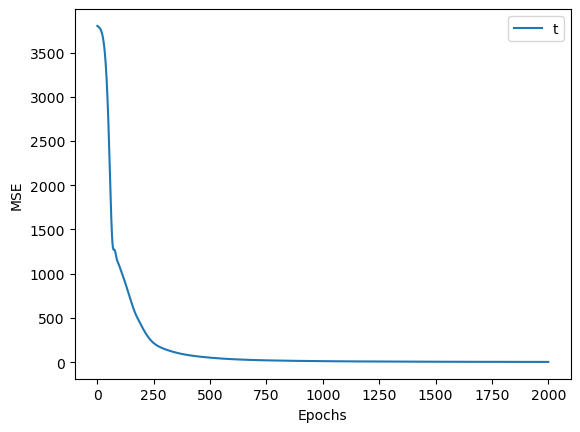

In [43]:
with torch.no_grad():
    plt.plot(Loss)
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend('train')

In [21]:
#------------------------Make predictions on training data-------------------------
with torch.no_grad():
    predicted = model(inputs)
    mse_train = criterion(predicted, targets)
    rmse_train = sqrt(train_loss)
    r2_score_train = r2_score(targets, predicted)
    
    
    
    print('Nonlinear Regression: NNet: Train')
    print('Test Mean squared error (MSE): ', mse_train)
    print('Test Root Mean squared error (RMSE): ', rmse_train)
    print('R2 Score: ', r2_score_train)
    
    
    

Nonlinear Regression: NNet: Train
Test Mean squared error (MSE):  tensor(2.1174)
Test Root Mean squared error (RMSE):  1.4551131890699676
R2 Score:  0.9946796648538803


In [24]:
with torch.no_grad():
    test_predictions = model(inputs_test)
    mse_test = criterion(test_predictions, targets_test)
    rmse_test = sqrt(mse_test)
    r2_score_test = r2_score(targets_test, test_predictions)
    
    
    
    print('Nonlinear Regression: NNet: Test')
    print('Test Mean squared error (MSE): ', mse_test)
    print('Test Root Mean squared error (RMSE): ', rmse_test)
    print('R2 Score: ', r2_score_test)
    
    

Nonlinear Regression: NNet: Test
Test Mean squared error (MSE):  tensor(77.7614)
Test Root Mean squared error (RMSE):  8.818242359757964
R2 Score:  0.8148229351275514


In [26]:
# Print the first 20 predictions
test_predictions =[ int(x) for x in test_predictions]
print('test_predictions: {} \n  Actual output : {}'.format(np.array(y_test[:20]),(test_predictions[:20])))

test_predictions: [27 58 81 53 80 30 60 27 19 90 54 26 74 81 76 77 24 94 23 86] 
  Actual output : [28, 41, 70, 54, 89, 33, 71, 26, 26, 83, 41, 37, 67, 68, 73, 74, 25, 91, 29, 78]


# Regression Trees 

In [27]:
# Load the dataset
# Reloading as it has been updated in the previous cells
data = pd.read_excel('.\\Dataset #1 - Regression (Brain Age Prediction)\\Volumetric_features.xlsx')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Age', axis=1), data['Age'], test_size=0.2, random_state=0)

In [28]:
# Fit the model
model = DecisionTreeRegressor(criterion='squared_error', splitter='best',max_depth=7)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [29]:
# Make predictions on the train set
y_pred = model.predict(X_train)
# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = sqrt(mse_train)
r2_score_regression_trees_train = r2_score(y_train, y_pred)
print('Regression Trees: Train')
print('Mean squared error (MSE): ', mse_train)
print('Root Mean squared error (RMSE): ', rmse_train)
print('R2 Score: ', r2_score_regression_trees_train)

Regression Trees: Train
Mean squared error (MSE):  44.15983974606266
Root Mean squared error (RMSE):  6.645287032631672
R2 Score:  0.8890383514852123


In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the mean squared error
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse_test)
r2_score_regression_trees_test = r2_score(y_test, y_pred)
print('Regression Trees: Test')
print('Mean squared error (MSE): ', mse_test)
print('Root Mean squared error (RMSE): ', rmse_test)
print('R2 Score: ', r2_score_regression_trees_test)

Regression Trees: Test
Mean squared error (MSE):  89.4900730911041
Root Mean squared error (RMSE):  9.45991929622574
R2 Score:  0.7868928519806366


In [31]:
#np.set_printoptions(precision=0)
#making predictions

predictions = model.predict(X_test)
predictions = [int(x) for x in predictions]
# Print the first 10 predictions
#print(predictions[:10])
print('  Actual labels:  {} \nPredicted labels: {}'.format(np.array(y_test[:20]), predictions[:20]))

  Actual labels:  [27 58 81 53 80 30 60 27 19 90 54 26 74 81 76 77 24 94 23 86] 
Predicted labels: [32, 58, 75, 56, 79, 36, 67, 26, 26, 88, 51, 32, 72, 75, 75, 76, 26, 88, 42, 72]
